In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
import random

In [2]:
dft=pd.read_csv("C:/Users/Wasyihun/Desktop/TitanicSurvivorPrediction/train.csv")
dftest=pd.read_csv("C:/Users/Wasyihun/Desktop/TitanicSurvivorPrediction/test.csv")

In [3]:
table = ff.create_table(dft.head().round(3))
iplot(table,filename='jupyter-table1')

In [4]:
dft.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
dft.shape

(891, 12)

In [5]:
iplot(ff.create_table(dft.dtypes.to_frame().reset_index().round(3)),filename='jupyter-table2')

In [ ]:
#Data Exploratory Data Analysis

In [30]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

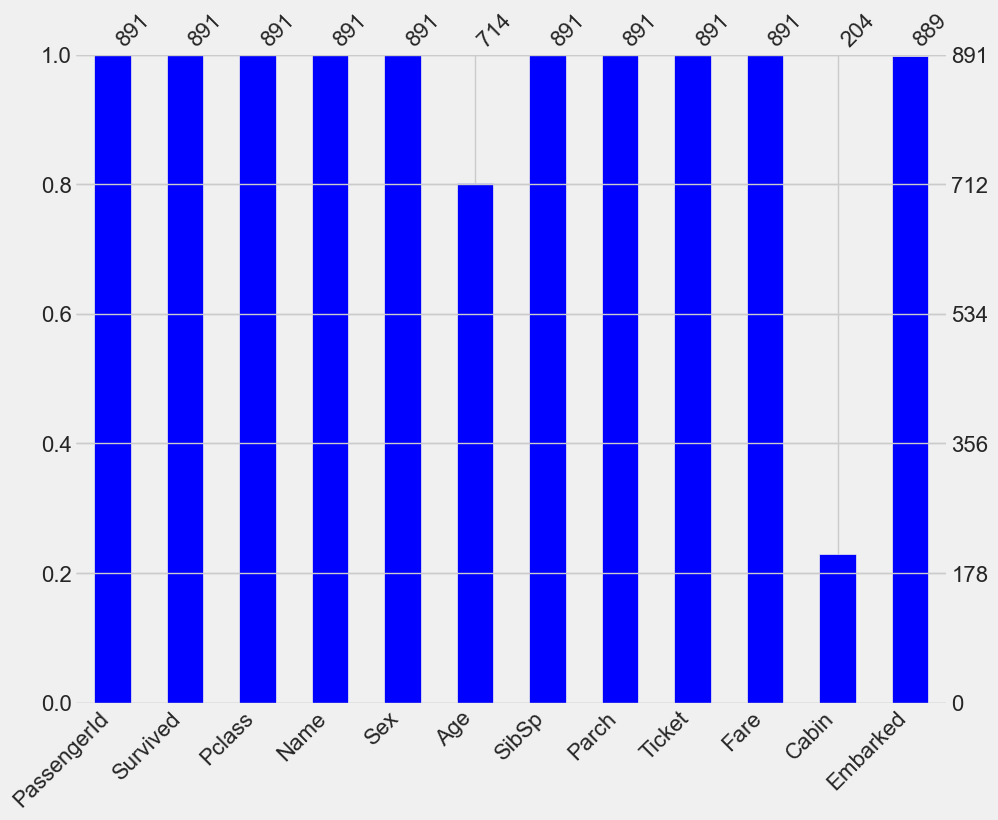

In [32]:
msno.bar(dft, color = 'b', figsize = (10,8))

<Axes: >

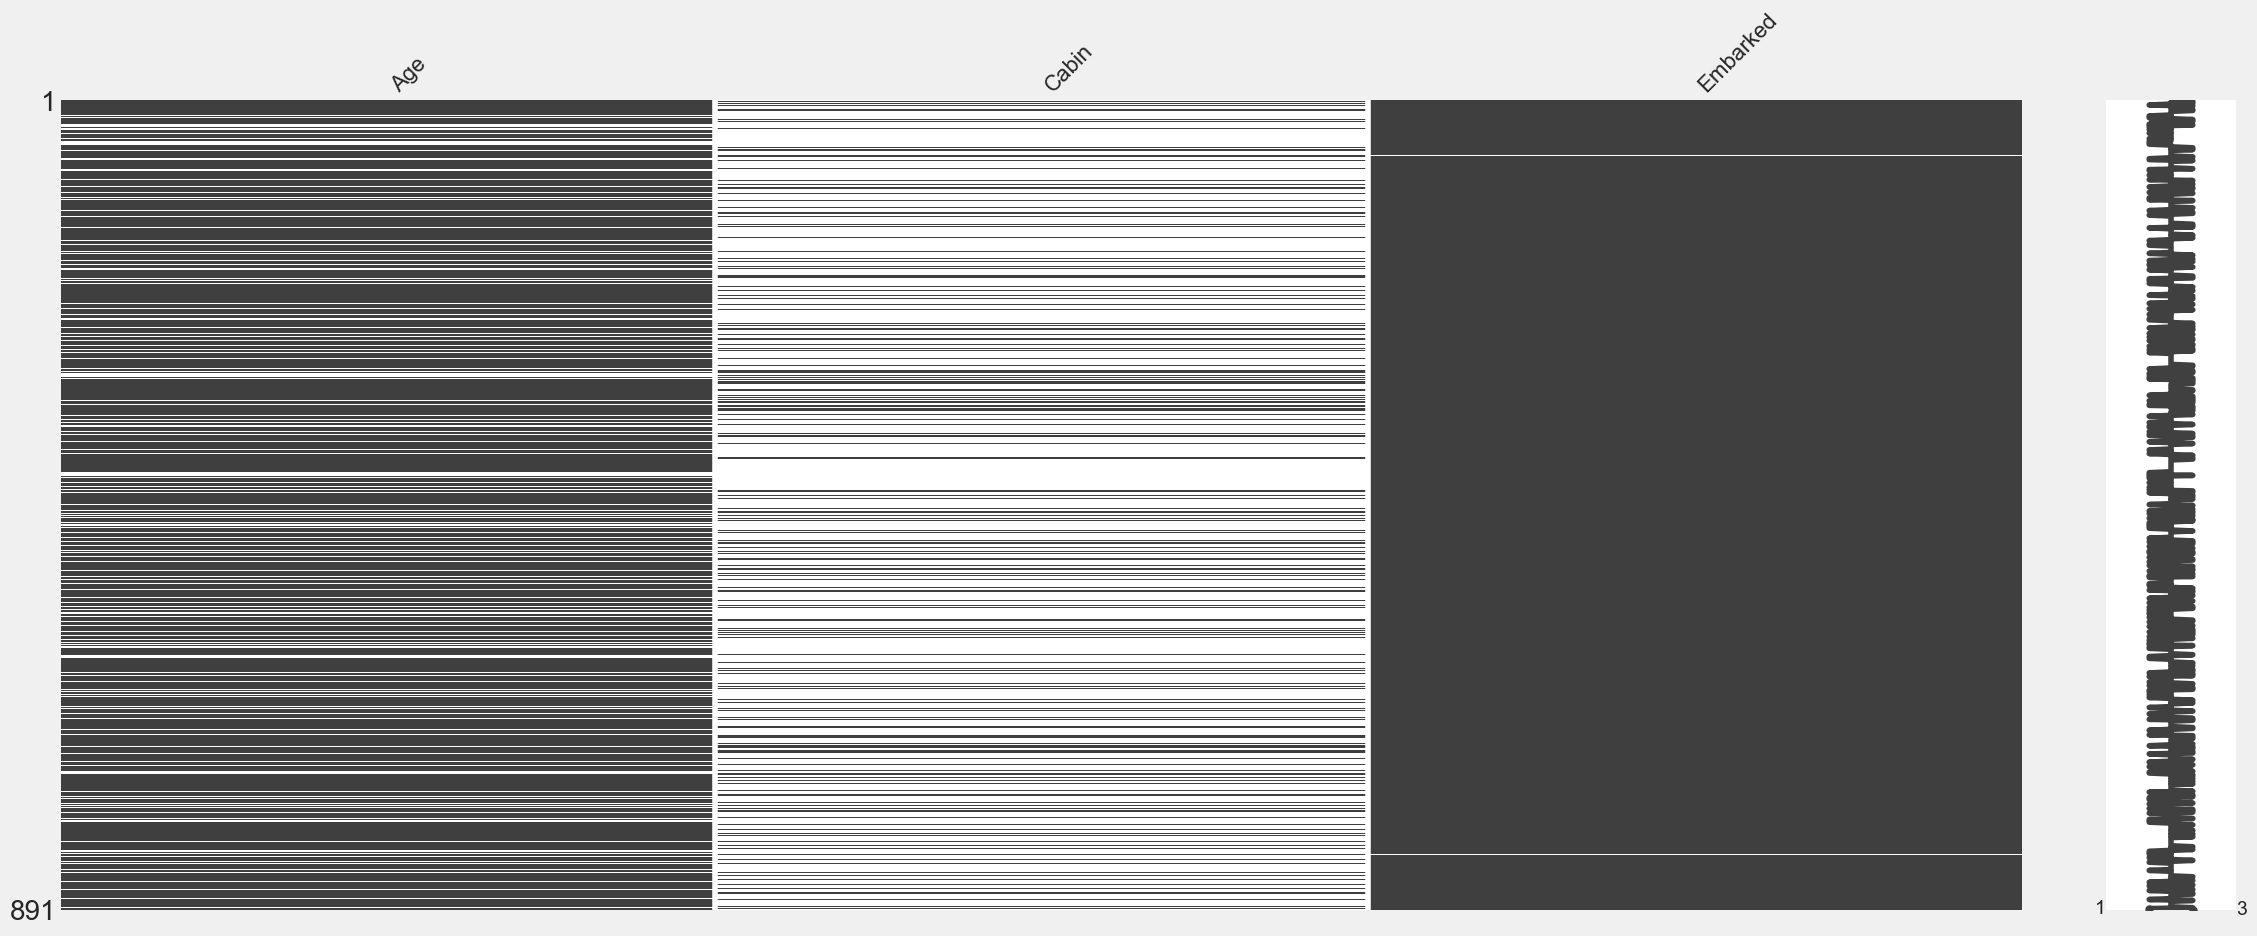

In [34]:
msno.matrix(dft[["Age","Cabin","Embarked"]])

<Axes: >

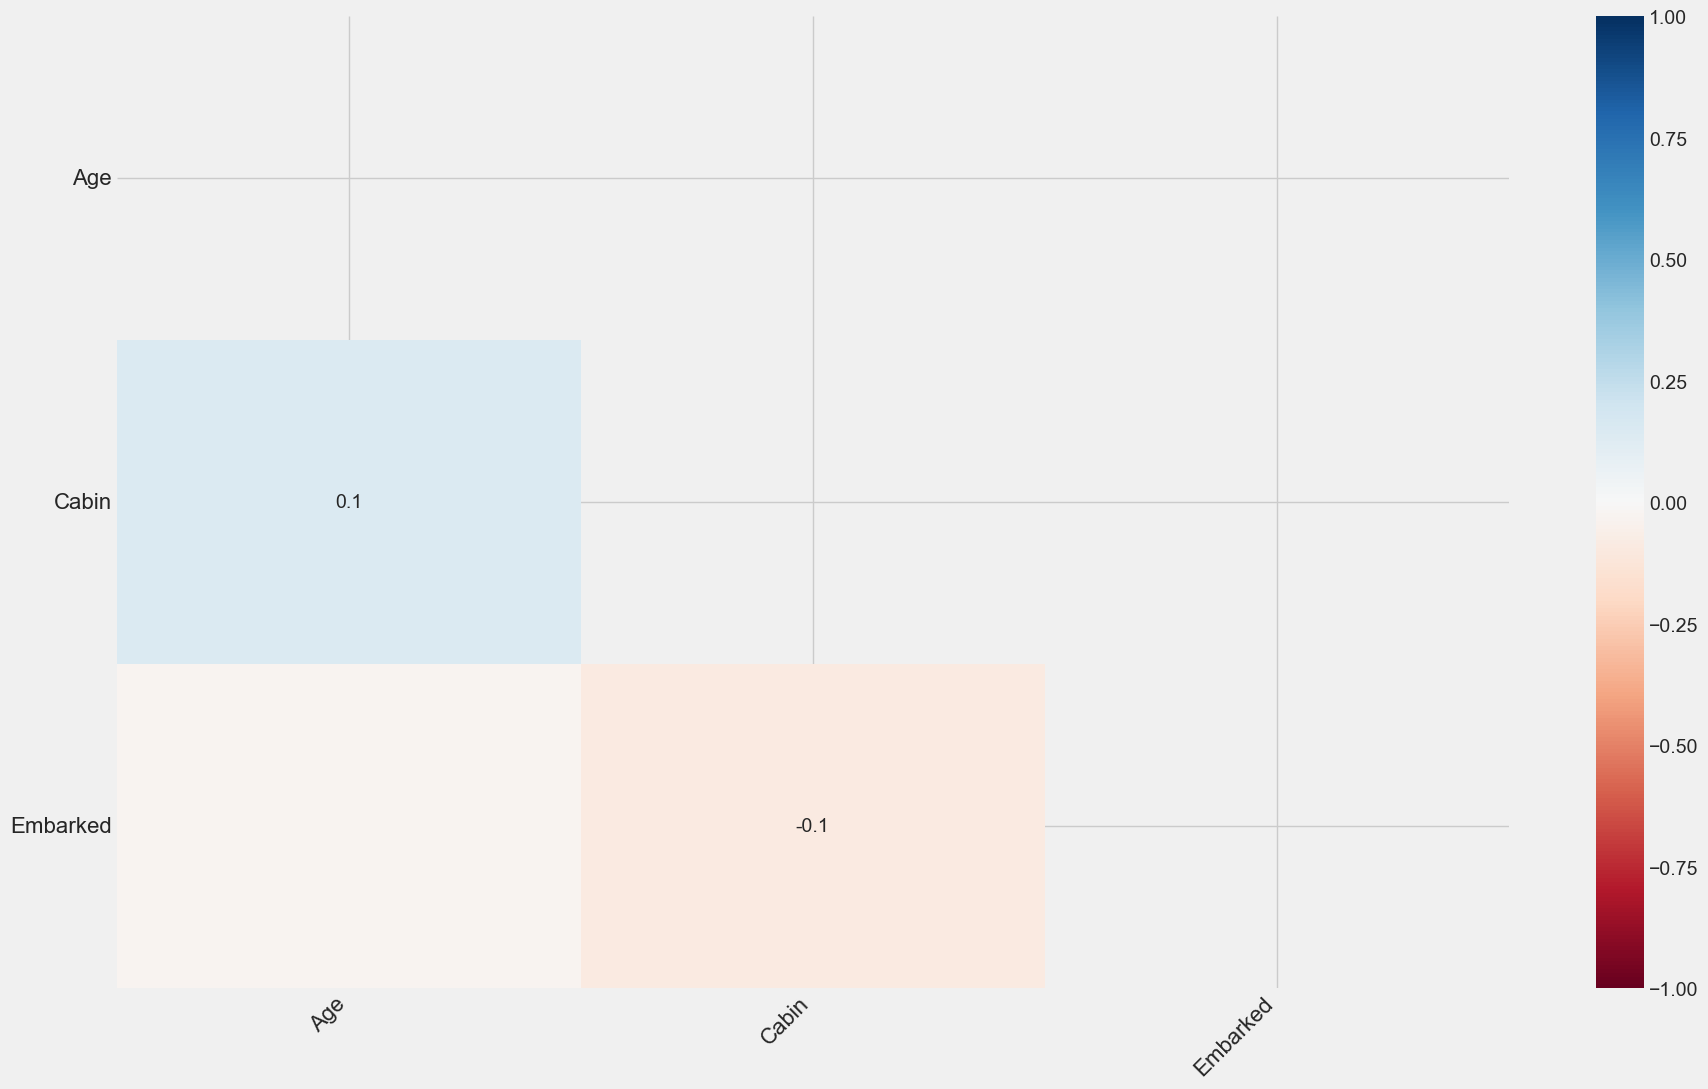

In [35]:
msno.heatmap(dft[["Age","Cabin","Embarked"]])

In [36]:
#Target Variable Analysis 

In [6]:
trace = go.Pie(labels = list(dft.Survived.unique()), values = list(dft.Survived.value_counts()))
data = [trace]
layout = go.Layout(
   {
      "title":"Number of Passenger Survived",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [24]:
#Analysis of Variable based on category

In [7]:
fig = go.Figure(data=[go.Pie(labels=dft['SibSp'], pull=[.1, .15, .15, 0])],layout_title_text=' SibSp ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

fig = go.Figure(
    data=[go.Bar(x = dft['SibSp'].value_counts().index,y=dft['SibSp'].value_counts())],layout_title_text=' SibSp ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [8]:
fig = go.Figure(data=[go.Pie(labels=dft['Parch'], pull=[.1, .15, .15, 0])],layout_title_text=' Parch ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

fig = go.Figure(
    data=[go.Bar(x = dft['Parch'].value_counts().index,y=dft['Parch'].value_counts())],layout_title_text=' Parch ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [9]:
fig = go.Figure(data=[go.Pie(labels=dft['Pclass'], pull=[.1, .15, .15, 0])],layout_title_text=' Pclass ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

fig = go.Figure(
    data=[go.Bar(x = dft['Pclass'].value_counts().index,y=dft['Pclass'].value_counts())],layout_title_text=' Pclass ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
# Analysis of Numerical value Variables

In [10]:
fig = go.Figure(
    data=[go.Histogram(x=dft["Fare"])],layout_title_text="Fare",layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [11]:
fig = go.Figure(
    data=[go.Histogram(x=dft['Age'])],layout_title_text=' Age Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [12]:
fig = go.Figure(
    data=[go.Histogram(x=dft['PassengerId'])],layout_title_text=' PassengerId Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [33]:
#Bivariate Data Analysis of Variables

In [13]:
survivedvspclass = dft[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvspclass, x="Pclass", y="Survived",color="Survived") 
fig.show()

In [14]:
survivedvssex = dft[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvssex, x="Sex", y="Survived",color="Survived") 
fig.show()

In [15]:
fig = px.histogram(dft, x="Age", color="Survived")
fig.show()

In [37]:
#Data preparation/pre-processing

In [40]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
 #drop the "Cabin" column from the dataframe ,it is almost empty
dft = dft.drop(columns='Cabin', axis=1)

In [43]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [44]:
# replacing the missing values in "Age" column with mean value
dft['Age'].fillna(dft['Age'].mean(), inplace=True)


In [45]:
dft.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [47]:

# finding the mode value of "Embarked" column
print(dft['Embarked'].mode())


0    S
Name: Embarked, dtype: object


In [48]:
# replacing the missing values in "Embarked" column with mode value
dft['Embarked'].fillna(dft['Embarked'].mode()[0], inplace=True)

In [49]:
dft.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
#Encoding the Categorical Columns

In [53]:
dft["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [54]:
dft['Survived']. value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [56]:
dft['Embarked'].value_counts()


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [61]:
# converting categorical Columns

dft.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [62]:
#Separating features & Target
X = dft.drop(columns = ['Name','Ticket','Survived'],axis=1)
Y = dft['Survived']

In [65]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.Collecting prettytable
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/4d/81/316b6a55a0d1f327d04cc7b0ba9d04058cb62de6c3a4d4b0df280cbe3b0b/prettytable-3.9.0-py3-none-any.whl.metadata



In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [68]:
#Model Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
classifiers = {
"Random Forest": RandomForestClassifier(random_state=42),
'Logistic Regression': LogisticRegression(random_state=42),
'SVC': SVC(),
'Wlleighbors': KNeighborsClassifier(),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'adatoost': AdaBoostClassifier (random_state=42)

}

# Train, evaluate, and select the best model
best_model = None
best_accuracy = 0

# Store accuracy scores and classification reports for all models
results = {}

for name, model in classifiers. items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    Classification_rep = classification_report(Y_test, y_pred)

    results[name] = {'accuracy': accuracy, 'classification_report': Classification_rep}


    print(f"{name} Accuracy:{accuracy})")
    print(f"{name} Classification Report:\n{Classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")

Random Forest Accuracy:0.770949720670391)
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.81      0.63      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179

Logistic Regression Accuracy:0.7821229050279329)
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

SVC Accuracy:0.7877094972067039)
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       100
      

In [70]:
#Hyper parameter Tuning
from sklearn.model_selection import ShuffleSplit

In [71]:
from sklearn.model_selection import GridSearchCV
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
          'svm': {
            'model': SVC(),
            'params': {
                'C': [1,5,10,20,40,50,60,100],
                'kernel': ['rbf', 'linear'],
                'gamma':['scale','auto']
            }
        },
        'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,40]
        }
    },
    'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini', 'log_loss', 'entropy'],
                'splitter': ['best','random']
            }
        },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
  'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
    },
          'adaboost': {
            'model': AdaBoostClassifier(estimator=DecisionTreeClassifier()),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1.0]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train_scaled, Y_train)

,model,best_score,best_params
0,logistic_regression,0.788811,{'C': 1}
1,svm,0.822378,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest,0.818182,{'n_estimators': 40}
3,decision_tree,0.767832,"{'criterion': 'entropy', 'splitter': 'random'}"
4,naive_bayes_gaussian,0.791608,{}
5,knn,0.815385,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}"
6,adaboost,0.749650,"{'learning_rate': 0.01, 'n_estimators': 100}"


In [72]:
svm_model=SVC(C= 5, gamma='scale', kernel='rbf').fit(X_train_scaled,Y_train)
predicted=svm_model.predict(X_test_scaled)
score=accuracy_score(Y_test,predicted)
score1=svm_model.score(X_test_scaled,Y_test)
print('accuracy_score',score)

accuracy_score 0.776536312849162


In [73]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
svm_pkl_filename = 'C:/Users/Wasyihun/Desktop/TitanicSurvivorPrediction/Titanic.pkl'
# Open the file to save as pkl file
svm_Model_pkl = open(svm_pkl_filename, 'wb')
pickle.dump(svm_model, svm_Model_pkl)
# Close the pickle instances
svm_Model_pkl.close()

In [16]:
pip install -U notebook-as-pdf

     ---------------------------------------- 0.0/83.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/83.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/83.4 kB ? eta -:--:--
     -------------- ----------------------- 30.7/83.4 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/83.4 kB 196.9 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/83.4 kB 252.2 kB/s eta 0:00:01
     -------------------------------------  81.9/83.4 kB 306.3 kB/s eta 0:00:01
     -------------------------------------  81.9/83.4 kB 306.3 kB/s eta 0:00:01
     -------------------------------------  81.9/83.4 kB 306.3 kB/s eta 0:00:01
     -------------------------------------- 83.4/83.4 kB 187.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
     ------------ -------------------------- 71.7/232.6 kB 1.3 MB/s eta 0:00:01
     --------------- ----------------------- 92.2/232.6 kB 1.3 MB/s et

In [1]:
pyppeteer-install

NameError: name 'pyppeteer' is not defined

In [2]:
jupyter-nbconvert --to pdfviahtml example.ipynb

SyntaxError: invalid syntax (3199819252.py, line 1)